In [105]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re
import string

import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('all')

from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator

from collections import Counter

from matplotlib import ticker
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report


sns.set(style="darkgrid")
import pandas as pd
import numpy as np
import re
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

import nltk
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading packa

In [107]:
data=pd.read_csv("/content/train[1].csv")
data.head()

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;


In [108]:
data['class'].value_counts()

class
1    19190
2     4163
0     1430
Name: count, dtype: int64

In [109]:
data.describe()

,count,hate_speech_count,offensive_language_count,neither_count,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,3.243473,0.280515,2.413711,0.549247,1.110277
std,0.883060,0.631851,1.399459,1.113299,0.462089
min,3.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,2.000000,0.000000,1.000000
50%,3.000000,0.000000,3.000000,0.000000,1.000000
75%,3.000000,0.000000,3.000000,0.000000,1.000000
max,9.000000,7.000000,9.000000,9.000000,2.000000


In [110]:
data.isna().sum()

count                       0
hate_speech_count           0
offensive_language_count    0
neither_count               0
class                       0
tweet                       0
dtype: int64

In [111]:
data.duplicated().sum()

0

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   count                     24783 non-null  int64 
 1   hate_speech_count         24783 non-null  int64 
 2   offensive_language_count  24783 non-null  int64 
 3   neither_count             24783 non-null  int64 
 4   class                     24783 non-null  int64 
 5   tweet                     24783 non-null  object
dtypes: int64(5), object(1)
memory usage: 1.1+ MB


In [113]:
data['tweet'][100]

'"@ClicquotSuave: LMAOOOOOOOOOOO this nigga @Krillz_Nuh_Care http://t.co/AAnpSUjmYI" &lt;bitch want likes for some depressing shit..foh'

In [114]:
data.head()

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;


In [115]:
(data
     .groupby("class")
     .agg(
        hate_speech_count=("hate_speech_count", "mean"),
        offensive_language_count=("offensive_language_count", "mean"),
        neither_count=("neither_count", "mean"),
     )
     .round(1)
)

,hate_speech_count,offensive_language_count,neither_count
class,,,
0,2.3,0.8,0.1
1,0.2,3.0,0.1
2,0.1,0.3,2.8


<Axes: xlabel='class', ylabel='Count'>

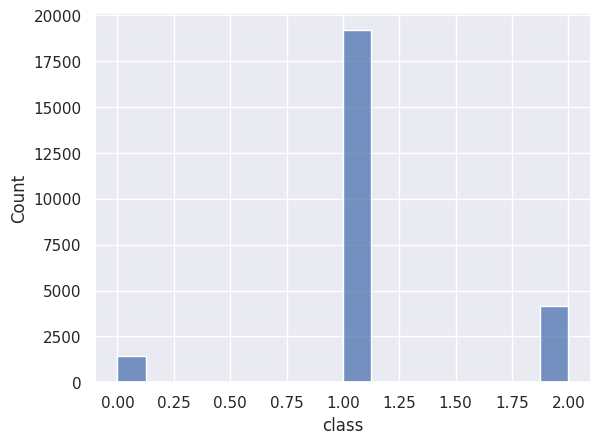

In [116]:
sns.histplot(data['class'])

<Axes: xlabel='class', ylabel='count'>

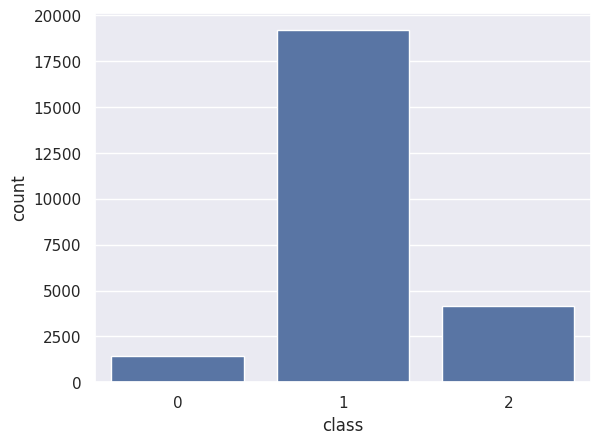

In [117]:
sns.countplot(x='class', data= data)

<Axes: xlabel='class', ylabel='count'>

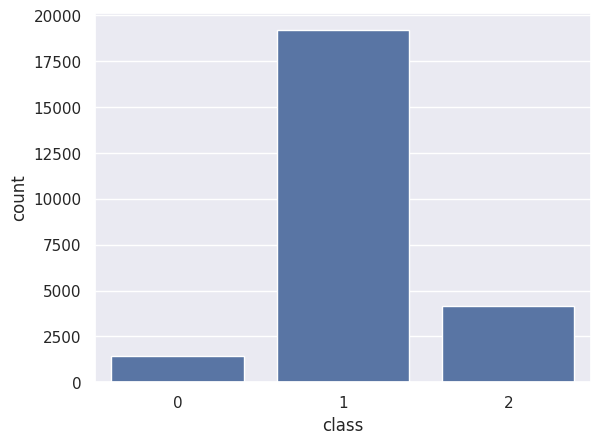

In [118]:
sns.countplot(x='class', data= data)

In [119]:
data["tweet"] = data["tweet"].apply(lambda x:re.sub(r'https?://\S+', '', str(x)))
data["tweet"]

0              !!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1                                                                     !!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2                                  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit
3                                                                                            !!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny
4                 !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;
                                                                                ...                                                                        
24778    you's a muthaf***in lie &#8220;@LifeAsKing: @20_Pearls 

In [120]:
data['tweet'] = data['tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['tweet']

0              !!! rt @mayasolovely: as a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1                                                                     !!!!! rt @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2                                  !!!!!!! rt @urkindofbrand dawg!!!! rt @80sbaby4life: you ever fuck a bitch and she start to cry? you be confused as shit
3                                                                                            !!!!!!!!! rt @c_g_anderson: @viva_based she look like a tranny
4                 !!!!!!!!!!!!! rt @shenikaroberts: the shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;
                                                                                ...                                                                        
24778    you's a muthaf***in lie &#8220;@lifeasking: @20_pearls 

In [121]:
data['tweet'] = data['tweet'].str.replace('[^\w\s]','')
data['tweet']

0              !!! rt @mayasolovely: as a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1                                                                     !!!!! rt @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2                                  !!!!!!! rt @urkindofbrand dawg!!!! rt @80sbaby4life: you ever fuck a bitch and she start to cry? you be confused as shit
3                                                                                            !!!!!!!!! rt @c_g_anderson: @viva_based she look like a tranny
4                 !!!!!!!!!!!!! rt @shenikaroberts: the shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;
                                                                                ...                                                                        
24778    you's a muthaf***in lie &#8220;@lifeasking: @20_pearls 

In [122]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
data["tweet"] = data["tweet"].apply(str)
data["tweet"] = data["tweet"].apply(remove_emoji)
data["tweet"]

0              !!! rt @mayasolovely: as a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1                                                                     !!!!! rt @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2                                  !!!!!!! rt @urkindofbrand dawg!!!! rt @80sbaby4life: you ever fuck a bitch and she start to cry? you be confused as shit
3                                                                                            !!!!!!!!! rt @c_g_anderson: @viva_based she look like a tranny
4                 !!!!!!!!!!!!! rt @shenikaroberts: the shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;
                                                                                ...                                                                        
24778    you's a muthaf***in lie &#8220;@lifeasking: @20_pearls 

In [123]:
data["tweet"] = data["tweet"].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))
data["tweet"] = data["tweet"].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))
data["tweet"]

0                 !!! rt @mayasolovely: aswoman you shouldn't complain about cleaning up your house. &amp; asman you should always take the trash out...
1                                                                  !!!!! rt @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2                                  !!!!!!! rt @urkindofbrand dawg!!!! rt @80sbaby4life: you ever fuckbitch and she start to cry? you be confused as shit
3                                                                                            !!!!!!!!! rt @c_g_anderson: @viva_based she look liketranny
4              !!!!!!!!!!!!! rt @shenikaroberts: the shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;
                                                                              ...                                                                       
24778    you'smuthaf***in lie &#8220;@lifeasking: @20_pearls @corey_emanuel right!

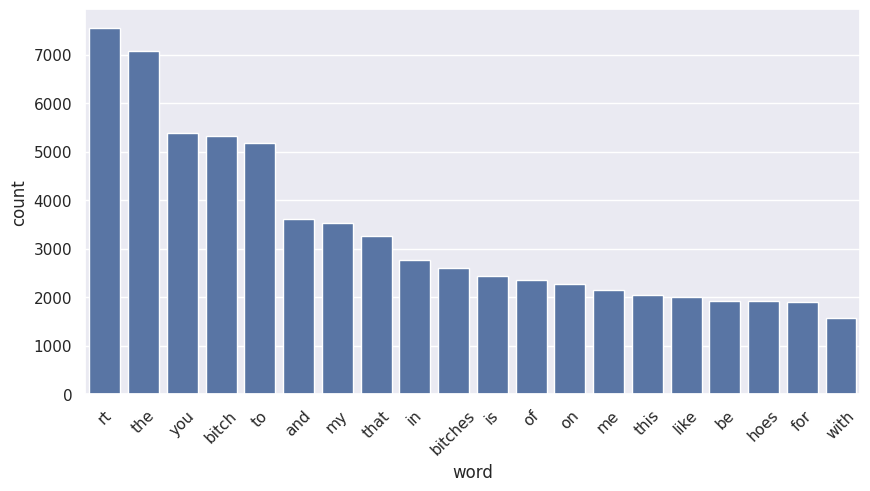

In [124]:
from collections import Counter

words = data['tweet'].apply(lambda x: [word for word in x.split()])

# most common words in the dataset (general)
words = [word for sublist in words for word in sublist]
word_count = Counter(words)
word_count.most_common(20)

# visualize the most common words
import matplotlib.pyplot as plt

word_count_df = pd.DataFrame(word_count.most_common(20), columns=['word', 'count'])

plt.figure(figsize=(10, 5))
sns.barplot(x='word', y='count', data=word_count_df)
plt.xticks(rotation=45)
plt.show()

In [125]:
stop_words = set(stopwords.words('english'))

stop_words.add('rt')

def remove_special_char(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)

## remove urls
def remove_urls(text):
    return re.sub(r'http\S+', '', text)

## remove usernames and hashtags
def remove_usernames_hashtags(text):
    return re.sub(r'@\w+|#\w+', '', text)

## remove extra spaces
def remove_extra_spaces(text):
    return re.sub(r'\s+', ' ', text)


##  clean the text
def clean_text(text):
    text = text.lower()
    text = remove_special_char(text)
    text = remove_urls(text)
    text = remove_usernames_hashtags(text)
    text = remove_extra_spaces(text)
    return text

In [126]:
data['cleaned_tweet'] = data['tweet'].apply(clean_text)

data.head()

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet,cleaned_tweet
0,3,0,0,3,2,!!! rt @mayasolovely: aswoman you shouldn't complain about cleaning up your house. &amp; asman you should always take the trash out...,rt mayasolovely aswoman you shouldnt complain about cleaning up your house amp asman you should always take the trash out
1,3,0,3,0,1,!!!!! rt @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,rt mleew17 boy dats coldtyga dwn bad for cuffin dat hoe in the 1st place
2,3,0,3,0,1,!!!!!!! rt @urkindofbrand dawg!!!! rt @80sbaby4life: you ever fuckbitch and she start to cry? you be confused as shit,rt urkindofbrand dawg rt 80sbaby4life you ever fuckbitch and she start to cry you be confused as shit
3,3,0,2,1,1,!!!!!!!!! rt @c_g_anderson: @viva_based she look liketranny,rt cganderson vivabased she look liketranny
4,6,0,6,0,1,!!!!!!!!!!!!! rt @shenikaroberts: the shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;,rt shenikaroberts the shit you hear about me might be true or it might be faker than the bitch who told it to ya 57361


In [127]:
data[['tweet', 'cleaned_tweet']].head(10)

,tweet,cleaned_tweet
0,!!! rt @mayasolovely: aswoman you shouldn't complain about cleaning up your house. &amp; asman you should always take the trash out...,rt mayasolovely aswoman you shouldnt complain about cleaning up your house amp asman you should always take the trash out
1,!!!!! rt @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,rt mleew17 boy dats coldtyga dwn bad for cuffin dat hoe in the 1st place
2,!!!!!!! rt @urkindofbrand dawg!!!! rt @80sbaby4life: you ever fuckbitch and she start to cry? you be confused as shit,rt urkindofbrand dawg rt 80sbaby4life you ever fuckbitch and she start to cry you be confused as shit
3,!!!!!!!!! rt @c_g_anderson: @viva_based she look liketranny,rt cganderson vivabased she look liketranny
4,!!!!!!!!!!!!! rt @shenikaroberts: the shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;,rt shenikaroberts the shit you hear about me might be true or it might be faker than the bitch who told it to ya 57361
5,"!!!!!!!!!!!!!!!!!!""@t_madison_x: the shit just blows me..claim you so faithful and down for somebody but still fucking with hoes! &#128514;&#128514;&#128514;""",tmadisonx the shit just blows meclaim you so faithful and down for somebody but still fucking with hoes 128514128514128514
6,"!!!!!!""@__brighterdays:can not just sit up and hate on another bitch ..got too much shit going on!""",brighterdayscan not just sit up and hate on another bitch got too much shit going on
7,!!!!&#8220;@selfiequeenbri: cause i'm tired of you big bitches coming for us skinny girls!!&#8221;,8220selfiequeenbri cause im tired of you big bitches coming for us skinny girls8221
8,""" &amp; you might not get ya bitch back &amp; thats that """,amp you might not get ya bitch back amp thats that
9,""" @rhythmixx_ :hobbies include: fighting mariam"" bitch",rhythmixx hobbies include fighting mariam bitch


In [128]:
def remove_stop_words(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

data['cleaned_tweet_two'] = data['cleaned_tweet'].apply(remove_stop_words)

data[['tweet', 'cleaned_tweet', 'cleaned_tweet_two']].head(10)

,tweet,cleaned_tweet,cleaned_tweet_two
0,!!! rt @mayasolovely: aswoman you shouldn't complain about cleaning up your house. &amp; asman you should always take the trash out...,rt mayasolovely aswoman you shouldnt complain about cleaning up your house amp asman you should always take the trash out,mayasolovely aswoman shouldnt complain cleaning house amp asman always take trash
1,!!!!! rt @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,rt mleew17 boy dats coldtyga dwn bad for cuffin dat hoe in the 1st place,mleew17 boy dats coldtyga dwn bad cuffin dat hoe 1st place
2,!!!!!!! rt @urkindofbrand dawg!!!! rt @80sbaby4life: you ever fuckbitch and she start to cry? you be confused as shit,rt urkindofbrand dawg rt 80sbaby4life you ever fuckbitch and she start to cry you be confused as shit,urkindofbrand dawg 80sbaby4life ever fuckbitch start cry confused shit
3,!!!!!!!!! rt @c_g_anderson: @viva_based she look liketranny,rt cganderson vivabased she look liketranny,cganderson vivabased look liketranny
4,!!!!!!!!!!!!! rt @shenikaroberts: the shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;,rt shenikaroberts the shit you hear about me might be true or it might be faker than the bitch who told it to ya 57361,shenikaroberts shit hear might true might faker bitch told ya 57361
5,"!!!!!!!!!!!!!!!!!!""@t_madison_x: the shit just blows me..claim you so faithful and down for somebody but still fucking with hoes! &#128514;&#128514;&#128514;""",tmadisonx the shit just blows meclaim you so faithful and down for somebody but still fucking with hoes 128514128514128514,tmadisonx shit blows meclaim faithful somebody still fucking hoes 128514128514128514
6,"!!!!!!""@__brighterdays:can not just sit up and hate on another bitch ..got too much shit going on!""",brighterdayscan not just sit up and hate on another bitch got too much shit going on,brighterdayscan sit hate another bitch got much shit going
7,!!!!&#8220;@selfiequeenbri: cause i'm tired of you big bitches coming for us skinny girls!!&#8221;,8220selfiequeenbri cause im tired of you big bitches coming for us skinny girls8221,8220selfiequeenbri cause im tired big bitches coming us skinny girls8221
8,""" &amp; you might not get ya bitch back &amp; thats that """,amp you might not get ya bitch back amp thats that,amp might get ya bitch back amp thats
9,""" @rhythmixx_ :hobbies include: fighting mariam"" bitch",rhythmixx hobbies include fighting mariam bitch,rhythmixx hobbies include fighting mariam bitch


In [129]:
def remove_short_words(text):
    return ' '.join([word for word in text.split() if len(word) > 2])
data['cleaned_tweet_three'] = data['cleaned_tweet_two'].apply(remove_short_words)

In [130]:
data[['tweet', 'cleaned_tweet', 'cleaned_tweet_two', 'cleaned_tweet_three']].tail(10)

,tweet,cleaned_tweet,cleaned_tweet_two,cleaned_tweet_three
24773,you niggers cheat on ya gf's? smh....,you niggers cheat on ya gfs smh,niggers cheat ya gfs smh,niggers cheat gfs smh
24774,you really care bout dis bitch. my dick all in yo feelings,you really care bout dis bitch my dick all in yo feelings,really care bout dis bitch dick yo feelings,really care bout dis bitch dick feelings
24775,"you worried bout other bitches, you need me for?",you worried bout other bitches you need me for,worried bout bitches need,worried bout bitches need
24776,you're all niggers,youre all niggers,youre niggers,youre niggers
24777,you're suchretardhope you get type 2 diabetes and die fromsugar rush you fucking faggot @dare_ilk,youre suchretardhope you get type 2 diabetes and die fromsugar rush you fucking faggot dareilk,youre suchretardhope get type 2 diabetes die fromsugar rush fucking faggot dareilk,youre suchretardhope get type diabetes die fromsugar rush fucking faggot dareilk
24778,"you'smuthaf***in lie &#8220;@lifeasking: @20_pearls @corey_emanuel right! his tl is trash &#8230;. now, mine? bible scriptures and hymns&#8221;",yousmuthafin lie 8220lifeasking 20pearls coreyemanuel right his tl is trash 8230 now mine bible scriptures and hymns8221,yousmuthafin lie 8220lifeasking 20pearls coreyemanuel right tl trash 8230 mine bible scriptures hymns8221,yousmuthafin lie 8220lifeasking 20pearls coreyemanuel right trash 8230 mine bible scriptures hymns8221
24779,"you've gone and broke the wrong heart baby, and drove me redneck crazy",youve gone and broke the wrong heart baby and drove me redneck crazy,youve gone broke wrong heart baby drove redneck crazy,youve gone broke wrong heart baby drove redneck crazy
24780,young buck wanna eat!!.. dat nigguh likeaint fuckin dis up again,young buck wanna eat dat nigguh likeaint fuckin dis up again,young buck wanna eat dat nigguh likeaint fuckin dis,young buck wanna eat dat nigguh likeaint fuckin dis
24781,youu got wild bitches tellin you lies,youu got wild bitches tellin you lies,youu got wild bitches tellin lies,youu got wild bitches tellin lies
24782,"~~ruffled | ntac eileen dahlia - beautiful color combination of pink, orange, yellow &amp; white.coll",ruffled ntac eileen dahlia beautiful color combination of pink orange yellow amp whitecoll,ruffled ntac eileen dahlia beautiful color combination pink orange yellow amp whitecoll,ruffled ntac eileen dahlia beautiful color combination pink orange yellow amp whitecoll


In [131]:
data[['tweet', 'cleaned_tweet', 'cleaned_tweet_two', 'cleaned_tweet_three']].head(10)

,tweet,cleaned_tweet,cleaned_tweet_two,cleaned_tweet_three
0,!!! rt @mayasolovely: aswoman you shouldn't complain about cleaning up your house. &amp; asman you should always take the trash out...,rt mayasolovely aswoman you shouldnt complain about cleaning up your house amp asman you should always take the trash out,mayasolovely aswoman shouldnt complain cleaning house amp asman always take trash,mayasolovely aswoman shouldnt complain cleaning house amp asman always take trash
1,!!!!! rt @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,rt mleew17 boy dats coldtyga dwn bad for cuffin dat hoe in the 1st place,mleew17 boy dats coldtyga dwn bad cuffin dat hoe 1st place,mleew17 boy dats coldtyga dwn bad cuffin dat hoe 1st place
2,!!!!!!! rt @urkindofbrand dawg!!!! rt @80sbaby4life: you ever fuckbitch and she start to cry? you be confused as shit,rt urkindofbrand dawg rt 80sbaby4life you ever fuckbitch and she start to cry you be confused as shit,urkindofbrand dawg 80sbaby4life ever fuckbitch start cry confused shit,urkindofbrand dawg 80sbaby4life ever fuckbitch start cry confused shit
3,!!!!!!!!! rt @c_g_anderson: @viva_based she look liketranny,rt cganderson vivabased she look liketranny,cganderson vivabased look liketranny,cganderson vivabased look liketranny
4,!!!!!!!!!!!!! rt @shenikaroberts: the shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;,rt shenikaroberts the shit you hear about me might be true or it might be faker than the bitch who told it to ya 57361,shenikaroberts shit hear might true might faker bitch told ya 57361,shenikaroberts shit hear might true might faker bitch told 57361
5,"!!!!!!!!!!!!!!!!!!""@t_madison_x: the shit just blows me..claim you so faithful and down for somebody but still fucking with hoes! &#128514;&#128514;&#128514;""",tmadisonx the shit just blows meclaim you so faithful and down for somebody but still fucking with hoes 128514128514128514,tmadisonx shit blows meclaim faithful somebody still fucking hoes 128514128514128514,tmadisonx shit blows meclaim faithful somebody still fucking hoes 128514128514128514
6,"!!!!!!""@__brighterdays:can not just sit up and hate on another bitch ..got too much shit going on!""",brighterdayscan not just sit up and hate on another bitch got too much shit going on,brighterdayscan sit hate another bitch got much shit going,brighterdayscan sit hate another bitch got much shit going
7,!!!!&#8220;@selfiequeenbri: cause i'm tired of you big bitches coming for us skinny girls!!&#8221;,8220selfiequeenbri cause im tired of you big bitches coming for us skinny girls8221,8220selfiequeenbri cause im tired big bitches coming us skinny girls8221,8220selfiequeenbri cause tired big bitches coming skinny girls8221
8,""" &amp; you might not get ya bitch back &amp; thats that """,amp you might not get ya bitch back amp thats that,amp might get ya bitch back amp thats,amp might get bitch back amp thats
9,""" @rhythmixx_ :hobbies include: fighting mariam"" bitch",rhythmixx hobbies include fighting mariam bitch,rhythmixx hobbies include fighting mariam bitch,rhythmixx hobbies include fighting mariam bitch


In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   count                     24783 non-null  int64 
 1   hate_speech_count         24783 non-null  int64 
 2   offensive_language_count  24783 non-null  int64 
 3   neither_count             24783 non-null  int64 
 4   class                     24783 non-null  int64 
 5   tweet                     24783 non-null  object
 6   cleaned_tweet             24783 non-null  object
 7   cleaned_tweet_two         24783 non-null  object
 8   cleaned_tweet_three       24783 non-null  object
dtypes: int64(5), object(4)
memory usage: 1.7+ MB


In [133]:
data.isnull().sum()

count                       0
hate_speech_count           0
offensive_language_count    0
neither_count               0
class                       0
tweet                       0
cleaned_tweet               0
cleaned_tweet_two           0
cleaned_tweet_three         0
dtype: int64

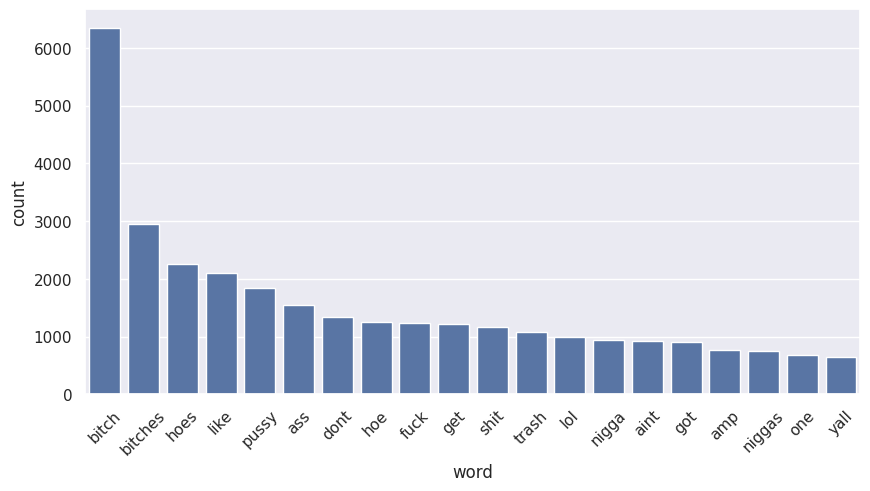

In [134]:
from collections import Counter

words = data['cleaned_tweet_three'].apply(lambda x: [word for word in x.split()])

# most common words in the dataset (general)
words = [word for sublist in words for word in sublist]
word_count = Counter(words)
word_count.most_common(20)

# visualize the most common words
import matplotlib.pyplot as plt

word_count_df = pd.DataFrame(word_count.most_common(20), columns=['word', 'count'])

plt.figure(figsize=(10, 5))
sns.barplot(x='word', y='count', data=word_count_df)
plt.xticks(rotation=45)
plt.show()

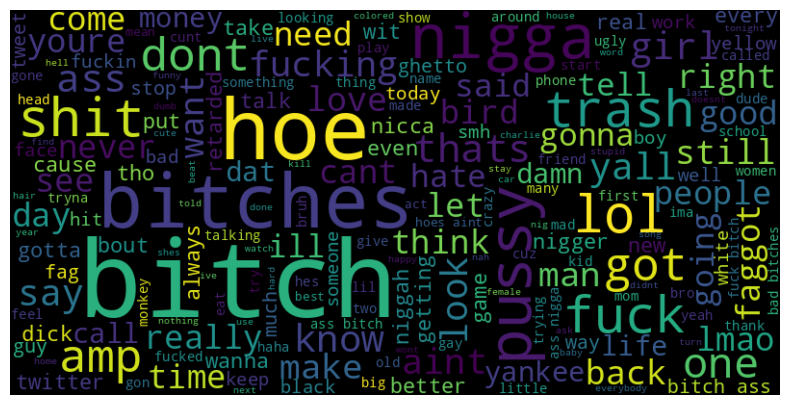

In [135]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(' '.join(words))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

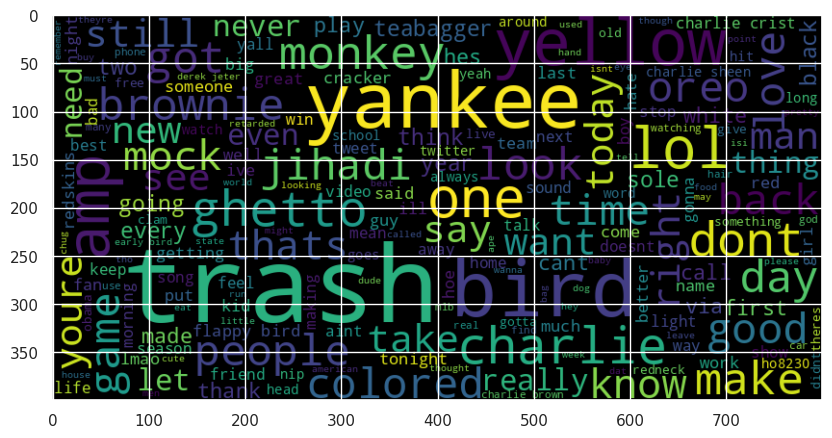

In [136]:
neutral_tweets = data[data['class'] == 2]['cleaned_tweet_three']
neutral_words = neutral_tweets.apply(lambda x: [word for word in x.split()])

neutral_words = [word for sublist in neutral_words for word in sublist]
neutral_word_count = Counter(neutral_words)
neutral_word_count.most_common(20)

wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(' '.join(neutral_words))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')

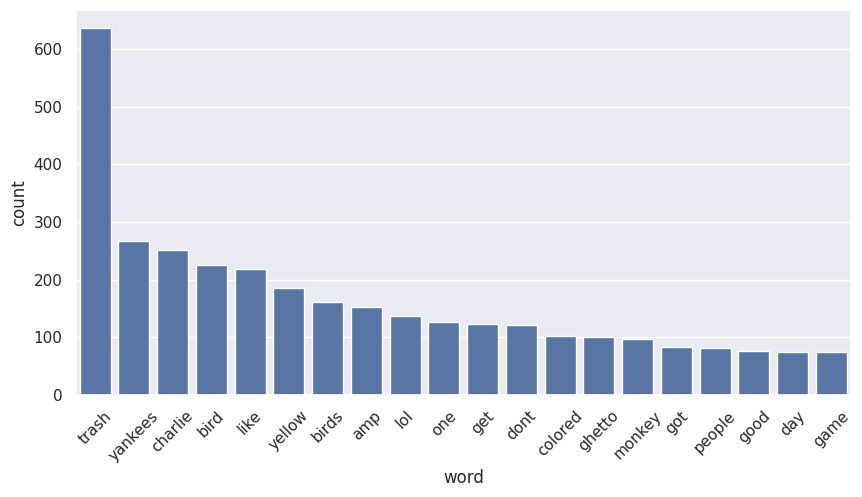

In [137]:
neutral_word_count_df = pd.DataFrame(neutral_word_count.most_common(20), columns=['word', 'count'])

plt.figure(figsize=(10, 5))
sns.barplot(x='word', y='count', data=neutral_word_count_df)
plt.xticks(rotation=45)
plt.show()

In [138]:
data[data['cleaned_tweet_three'].str.contains('trash')]
data[data['cleaned_tweet_three'].str.contains('trash')]['class'].value_counts()

class
2    681
1    349
0    109
Name: count, dtype: int64

In [139]:
pd.set_option('display.max_colwidth', None)
full_tweets_with_word_trash = data[data['cleaned_tweet_three'].str.contains('trash')]['cleaned_tweet_three'].sample(5)
print(full_tweets_with_word_trash)

23762     even make dresses straps amp cover ass tits ampbig asswill settle fortrash bag
4063                                                            mcsheeti means trash lol
14033                                    490xl get attached people jump intrash feel way
22783    would life without god levimitchellseriously probably living intrash haha128514
2785                                         carxlito ps3 case still trash idgaf anymore
Name: cleaned_tweet_three, dtype: object


In [140]:
import textblob
from textblob import TextBlob

def tokenization(text):
    text = re.split('\W+', text)
    return text

data['Text_tokenized'] = data['cleaned_tweet_three'].apply(lambda x: tokenization(x.lower()))
data.head()

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet,cleaned_tweet,cleaned_tweet_two,cleaned_tweet_three,Text_tokenized
0,3,0,0,3,2,!!! rt @mayasolovely: aswoman you shouldn't complain about cleaning up your house. &amp; asman you should always take the trash out...,rt mayasolovely aswoman you shouldnt complain about cleaning up your house amp asman you should always take the trash out,mayasolovely aswoman shouldnt complain cleaning house amp asman always take trash,mayasolovely aswoman shouldnt complain cleaning house amp asman always take trash,"[mayasolovely, aswoman, shouldnt, complain, cleaning, house, amp, asman, always, take, trash]"
1,3,0,3,0,1,!!!!! rt @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,rt mleew17 boy dats coldtyga dwn bad for cuffin dat hoe in the 1st place,mleew17 boy dats coldtyga dwn bad cuffin dat hoe 1st place,mleew17 boy dats coldtyga dwn bad cuffin dat hoe 1st place,"[mleew17, boy, dats, coldtyga, dwn, bad, cuffin, dat, hoe, 1st, place]"
2,3,0,3,0,1,!!!!!!! rt @urkindofbrand dawg!!!! rt @80sbaby4life: you ever fuckbitch and she start to cry? you be confused as shit,rt urkindofbrand dawg rt 80sbaby4life you ever fuckbitch and she start to cry you be confused as shit,urkindofbrand dawg 80sbaby4life ever fuckbitch start cry confused shit,urkindofbrand dawg 80sbaby4life ever fuckbitch start cry confused shit,"[urkindofbrand, dawg, 80sbaby4life, ever, fuckbitch, start, cry, confused, shit]"
3,3,0,2,1,1,!!!!!!!!! rt @c_g_anderson: @viva_based she look liketranny,rt cganderson vivabased she look liketranny,cganderson vivabased look liketranny,cganderson vivabased look liketranny,"[cganderson, vivabased, look, liketranny]"
4,6,0,6,0,1,!!!!!!!!!!!!! rt @shenikaroberts: the shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;,rt shenikaroberts the shit you hear about me might be true or it might be faker than the bitch who told it to ya 57361,shenikaroberts shit hear might true might faker bitch told ya 57361,shenikaroberts shit hear might true might faker bitch told 57361,"[shenikaroberts, shit, hear, might, true, might, faker, bitch, told, 57361]"


In [141]:
! python3 -m nltk.downloader wordnet

/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [142]:
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.stem import WordNetLemmatizer
wordNet = WordNetLemmatizer()
def lemmatizer(text):
    text = [wordNet.lemmatize(word) for word in text]
    return text

data['Text_lemmatized'] = data['Text_tokenized'].apply(lambda x: lemmatizer(x))
data.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,count,hate_speech_count,offensive_language_count,neither_count,class,tweet,cleaned_tweet,cleaned_tweet_two,cleaned_tweet_three,Text_tokenized,Text_lemmatized
0,3,0,0,3,2,!!! rt @mayasolovely: aswoman you shouldn't complain about cleaning up your house. &amp; asman you should always take the trash out...,rt mayasolovely aswoman you shouldnt complain about cleaning up your house amp asman you should always take the trash out,mayasolovely aswoman shouldnt complain cleaning house amp asman always take trash,mayasolovely aswoman shouldnt complain cleaning house amp asman always take trash,"[mayasolovely, aswoman, shouldnt, complain, cleaning, house, amp, asman, always, take, trash]","[mayasolovely, aswoman, shouldnt, complain, cleaning, house, amp, asman, always, take, trash]"
1,3,0,3,0,1,!!!!! rt @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,rt mleew17 boy dats coldtyga dwn bad for cuffin dat hoe in the 1st place,mleew17 boy dats coldtyga dwn bad cuffin dat hoe 1st place,mleew17 boy dats coldtyga dwn bad cuffin dat hoe 1st place,"[mleew17, boy, dats, coldtyga, dwn, bad, cuffin, dat, hoe, 1st, place]","[mleew17, boy, dat, coldtyga, dwn, bad, cuffin, dat, hoe, 1st, place]"
2,3,0,3,0,1,!!!!!!! rt @urkindofbrand dawg!!!! rt @80sbaby4life: you ever fuckbitch and she start to cry? you be confused as shit,rt urkindofbrand dawg rt 80sbaby4life you ever fuckbitch and she start to cry you be confused as shit,urkindofbrand dawg 80sbaby4life ever fuckbitch start cry confused shit,urkindofbrand dawg 80sbaby4life ever fuckbitch start cry confused shit,"[urkindofbrand, dawg, 80sbaby4life, ever, fuckbitch, start, cry, confused, shit]","[urkindofbrand, dawg, 80sbaby4life, ever, fuckbitch, start, cry, confused, shit]"
3,3,0,2,1,1,!!!!!!!!! rt @c_g_anderson: @viva_based she look liketranny,rt cganderson vivabased she look liketranny,cganderson vivabased look liketranny,cganderson vivabased look liketranny,"[cganderson, vivabased, look, liketranny]","[cganderson, vivabased, look, liketranny]"
4,6,0,6,0,1,!!!!!!!!!!!!! rt @shenikaroberts: the shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;,rt shenikaroberts the shit you hear about me might be true or it might be faker than the bitch who told it to ya 57361,shenikaroberts shit hear might true might faker bitch told ya 57361,shenikaroberts shit hear might true might faker bitch told 57361,"[shenikaroberts, shit, hear, might, true, might, faker, bitch, told, 57361]","[shenikaroberts, shit, hear, might, true, might, faker, bitch, told, 57361]"


In [143]:
X = data["cleaned_tweet_three"]
y = data["class"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20)

In [144]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit((X_train).values.astype('U'))
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

No. of feature_words:  153200


In [145]:
X_train = vectoriser.transform((X_train).values.astype('U'))
X_test  = vectoriser.transform((X_test).values.astype('U'))

In [146]:
X_train.shape, X_test.shape

((19826, 153200), (4957, 153200))

In [147]:
print(f"num test tweet: {y_test.shape[0]}")
print(f"num train tweet: {y_train.shape[0]}")

num test tweet: 4957
num train tweet: 19826


In [148]:
def model_evaluate(model,X_test):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    cf_matrix = confusion_matrix(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    cm_df = pd.DataFrame(cm,
                     index = ['hate speech','offensive language','Neutral'],
                     columns = ['hate speech','offensive language','Neutral'])

    #Plotting the confusion matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(cm_df, annot=True, cmap="Oranges",linecolor="gray")
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values')
    plt.show()

In [149]:
lr_model = LogisticRegression(C = 1, max_iter = 1000, penalty = 'l2', n_jobs=-1)
lr_model.fit(X_train  ,y_train)

LogisticRegression(C=1, max_iter=1000, n_jobs=-1)

              precision    recall  f1-score   support

           0       0.58      0.12      0.20       291
           1       0.88      0.98      0.93      3840
           2       0.87      0.68      0.76       826

    accuracy                           0.88      4957
   macro avg       0.78      0.59      0.63      4957
weighted avg       0.86      0.88      0.86      4957



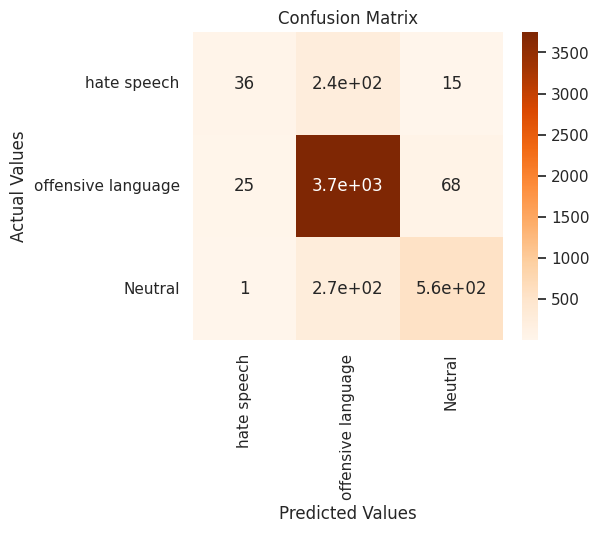

In [150]:
model_evaluate(lr_model ,X_test)

In [151]:
from sklearn.tree import DecisionTreeClassifier

dtmodel = DecisionTreeClassifier()
dtc = dtmodel.fit(X_train,y_train)

              precision    recall  f1-score   support

           0       0.36      0.30      0.33       291
           1       0.91      0.93      0.92      3840
           2       0.79      0.75      0.77       826

    accuracy                           0.86      4957
   macro avg       0.69      0.66      0.67      4957
weighted avg       0.86      0.86      0.86      4957



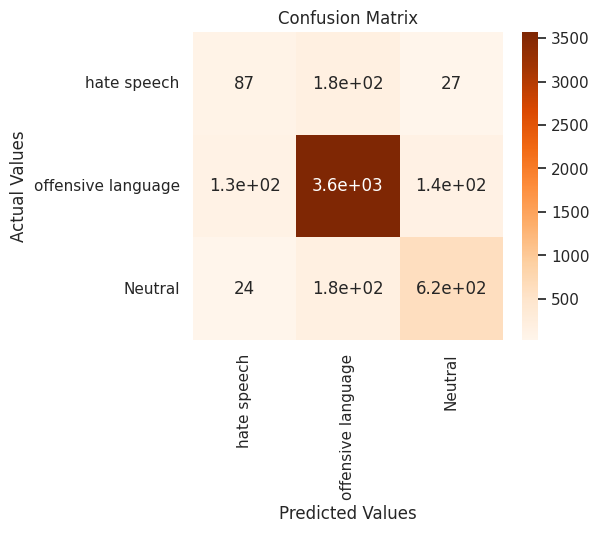

In [152]:
model_evaluate(dtc ,X_test)

In [153]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train  ,y_train)

KNeighborsClassifier(n_neighbors=3)

              precision    recall  f1-score   support

           0       0.34      0.31      0.32       291
           1       0.87      0.94      0.90      3840
           2       0.77      0.52      0.62       826

    accuracy                           0.83      4957
   macro avg       0.66      0.59      0.61      4957
weighted avg       0.82      0.83      0.82      4957



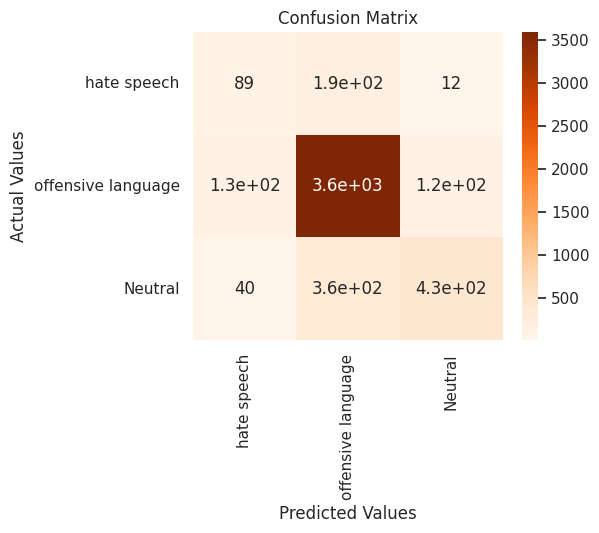

In [154]:
model_evaluate(neigh ,X_test)

In [155]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rfc=RandomForestClassifier(n_estimators=10)

#Train the model using the training sets y_pred=clf.predict(X_test)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

              precision    recall  f1-score   support

           0       0.45      0.21      0.29       291
           1       0.88      0.96      0.92      3840
           2       0.87      0.66      0.75       826

    accuracy                           0.87      4957
   macro avg       0.73      0.61      0.65      4957
weighted avg       0.85      0.87      0.86      4957



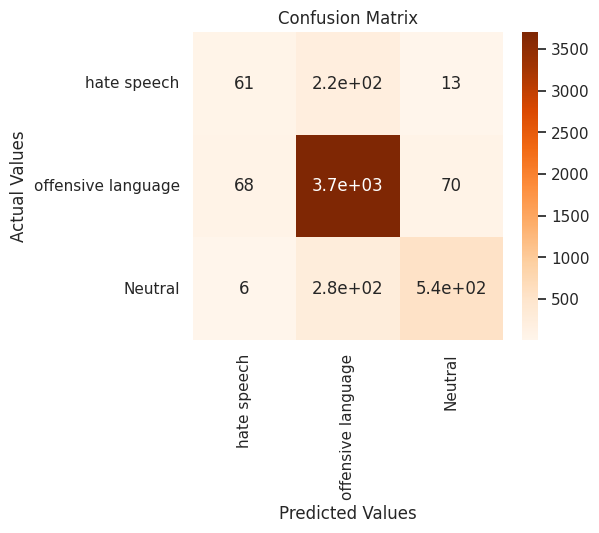

In [156]:
model_evaluate(rfc ,X_test)

In [157]:
#Import XGB FModel
import xgboost as xgb

#Create a XGB Classifier
xgb_model=xgb.XGBClassifier(objective="multi:softprob")

#Train the model using the training sets
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

              precision    recall  f1-score   support

           0       0.52      0.19      0.28       291
           1       0.88      0.97      0.92      3840
           2       0.88      0.66      0.75       826

    accuracy                           0.87      4957
   macro avg       0.76      0.61      0.65      4957
weighted avg       0.86      0.87      0.86      4957



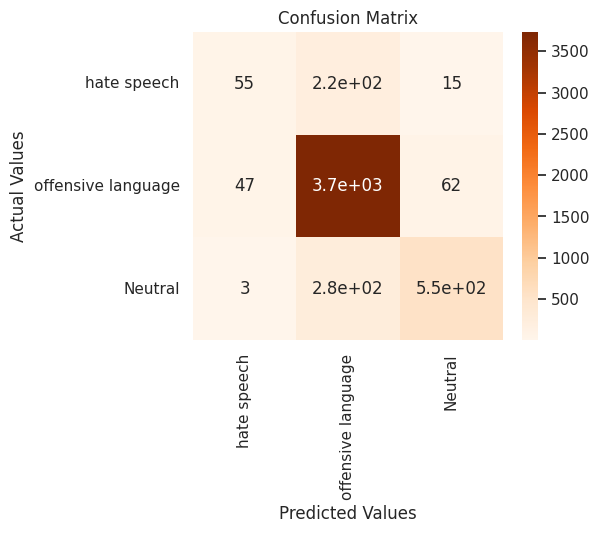

In [158]:
model_evaluate(xgb_model,X_test)

In [159]:
import lightgbm as lgb
lgb = lgb.LGBMClassifier()
lgb.fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.147154 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 26818
[LightGBM] [Info] Number of data points in the train set: 19826, number of used features: 1024
[LightGBM] [Info] Start training from score -2.856844
[LightGBM] [Info] Start training from score -0.255879
[LightGBM] [Info] Start training from score -1.781922


LGBMClassifier()

              precision    recall  f1-score   support

           0       0.46      0.22      0.29       291
           1       0.89      0.96      0.92      3840
           2       0.85      0.66      0.74       826

    accuracy                           0.87      4957
   macro avg       0.73      0.61      0.65      4957
weighted avg       0.85      0.87      0.86      4957



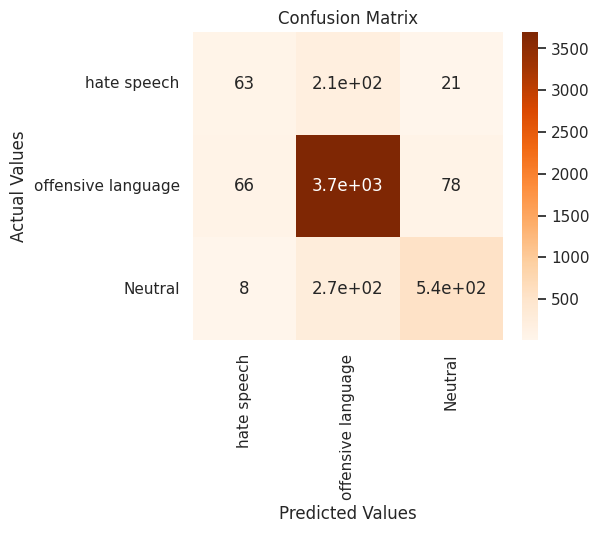

In [160]:
model_evaluate(lgb,X_test)

In [161]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV

# Define the LightGBM model
model = lgb.LGBMClassifier()

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                                   n_iter=8, scoring='accuracy', cv=3, random_state=42)

In [162]:
random_search.fit(X_train, y_train)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

RandomizedSearchCV(cv=3, estimator=LGBMClassifier(), n_iter=8,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 200]},
                   random_state=42, scoring='accuracy')

In [163]:
# Print the best parameters and the best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Parameters: {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1}
Best Score: 0.859780030068812


In [164]:
# Evaluate the model with best parameters on the test set
best_model = random_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test Score:", test_score)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Test Score: 0.8672584224329232


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
              precision    recall  f1-score   support

           0       0.47      0.21      0.29       291
           1       0.88      0.97      0.92      3840
           2       0.87      0.63      0.73       826

    accuracy                           0.87      4957
   macro avg       0.74      0.60      0.65      4957
weighted avg       0.85      0.87      0.85      4957



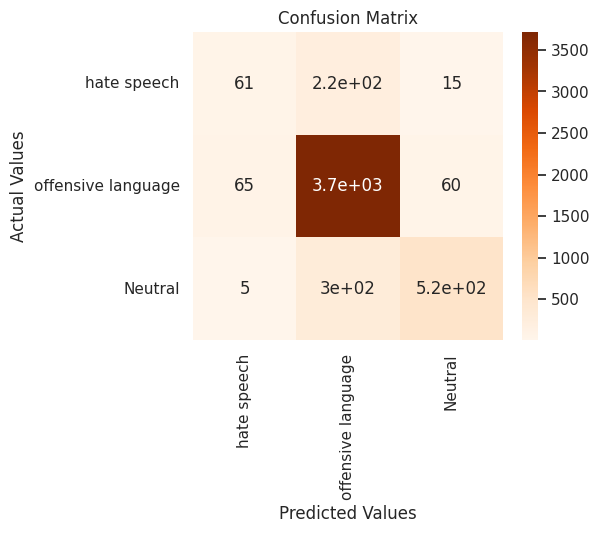

In [165]:
model_evaluate(best_model,X_test)

In [166]:
test_tweet = ['I hate you']

tweet_tfidf = vectoriser.transform(test_tweet)
lr_model.predict(tweet_tfidf)

array([1])

In [167]:
test_tweet = ['You are so stupid']

tweet_tfidf = vectoriser.transform(test_tweet)
lr_model.predict(tweet_tfidf)

array([1])

In [168]:
test_tweet = ['I am learning data science very well']

tweet_tfidf = vectoriser.transform(test_tweet)
lr_model.predict(tweet_tfidf)

array([1])

In [169]:
import subprocess

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import namedtuple
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.sequence import pad_sequences

try:
    nltk.data.find('wordnet.zip')
except:
    nltk.download('wordnet', download_dir='/kaggle/working/')
    command = "unzip /kaggle/working/corpora/wordnet.zip -d /kaggle/working/corpora"
    subprocess.run(command.split())
    nltk.data.path.append('/kaggle/working/')

[nltk_data] Downloading package wordnet to /kaggle/working/...
[nltk_data]   Package wordnet is already up-to-date!


In [170]:
import pandas as pd

# Assuming you have a CSV file 'data.csv' with the columns
data = pd.read_csv('/content/train[1].csv')

# Create the DataFrame
df = pd.DataFrame(data)

# Now you can operate on the df DataFrame
df = df.drop(columns=["count", "hate_speech_count", "offensive_language_count", "neither_count"])

In [171]:
class_map = {
    0: "hate speech",
    1: "offensive speech",
    2: "neutral speech"
}

In [172]:
def remove_urls(text, replacement_text=""):
    """Remove URLs from string."""
    pattern = re.compile(r"https?://\S+|www\.\S+")
    return pattern.sub(replacement_text, text)


def remove_twitter_handles(text, replacement_text=""):
    """Remove twitter handles from string."""
    pattern = re.compile(r"@[\w]+")
    return pattern.sub(replacement_text, text)


def remove_twitter_rt(text, replacement_text=""):
    """Remove twitter RTs from string."""
    pattern = re.compile(r"^RT|\s+RT\s+")
    return pattern.sub(replacement_text, text)


def remove_alphanumerics(text, replacement_text=" "):
    """Remove alphanumerics from string but leave single quote be."""
    pattern = re.compile(r"[^A-Za-z0-9']+")
    return pattern.sub(replacement_text, text)


def remove_multiple_whitespaces(text, replacement_text=" "):
    """Remove multiple whitespaces from string."""
    pattern = re.compile(r"\s{2,}")
    return pattern.sub(replacement_text, text)


def decode_html_character_references(text):
    """Decode HTML chacarters in string, e.g. &#38; and &amp;."""
    import html
    return html.unescape(text)


df = (df
    .assign(
        tweet_clean=lambda df_: (df_["tweet"]
            .apply(decode_html_character_references)
            .apply(remove_twitter_handles)
            .apply(remove_twitter_rt)
            .apply(remove_urls)
            .apply(remove_alphanumerics)
            .apply(remove_multiple_whitespaces)
            .str.strip()
        )
    )
)

df.tail()

,class,tweet,tweet_clean
24778,1,"you's a muthaf***in lie &#8220;@LifeAsKing: @20_Pearls @corey_emanuel right! His TL is trash &#8230;. Now, mine? Bible scriptures and hymns&#8221;",you's a muthaf in lie right His TL is trash Now mine Bible scriptures and hymns
24779,2,"you've gone and broke the wrong heart baby, and drove me redneck crazy",you've gone and broke the wrong heart baby and drove me redneck crazy
24780,1,young buck wanna eat!!.. dat nigguh like I aint fuckin dis up again,young buck wanna eat dat nigguh like I aint fuckin dis up again
24781,1,youu got wild bitches tellin you lies,youu got wild bitches tellin you lies
24782,2,"~~Ruffled | Ntac Eileen Dahlia - Beautiful color combination of pink, orange, yellow &amp; white. A Coll http://t.co/H0dYEBvnZB",Ruffled Ntac Eileen Dahlia Beautiful color combination of pink orange yellow white A Coll


In [173]:
def tokenize(doc):
    return word_tokenize(doc)


def remove_stopwords(doc):
    stops = set(stopwords.words("english"))
    stops.add("rt")
    return [token for token in doc if token not in stops]


def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"ain\'t", "are not", phrase)
    phrase = re.sub(r"shan\'t", "shall not", phrase)
    phrase = re.sub(r"ma\'am", "maam", phrase)
    phrase = re.sub(r"y\'all", "you all", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

lemmatizer = WordNetLemmatizer()

df = (df
    .assign(
        tweet_preprocessed=lambda df_: (
            df_["tweet_clean"]
            .str.lower()
            .apply(lambda doc: [decontracted(word) for word in doc.split(" ")])
            .apply(lambda doc: [lemmatizer.lemmatize(word) for word in doc])
            .apply(lambda doc: " ".join(doc))
            .apply(word_tokenize)
            .apply(remove_stopwords)
       )
    )
)

df.sample(5)

,class,tweet,tweet_clean,tweet_preprocessed
18006,1,RT @WFUncleEllis: My bitch sad lookin like a lack of funny,My bitch sad lookin like a lack of funny,"[bitch, sad, lookin, like, lack, funny]"
7869,1,Aye the part be treating the bitches too good &#128514;,Aye the part be treating the bitches too good,"[aye, part, treating, bitch, good]"
15559,1,"RT @IEatHeartsBitch: If you tell her the dick good she gone wanna try, tell her it's wack she gone wanna see for herself. A hoe gone be a h&#8230;",If you tell her the dick good she gone wanna try tell her it's wack she gone wanna see for herself A hoe gone be a h,"[tell, dick, good, gone, wan, na, try, tell, wack, gone, wan, na, see, hoe, gone, h]"
20547,1,Ross got Amber Rose naked these hoes ain't loyal wiz,Ross got Amber Rose naked these hoes ain't loyal wiz,"[ross, got, amber, rose, naked, hoe, loyal, wiz]"
1786,1,&#8220;@iamSHIRAQ: @WhereYoHussleAt @CayMarieee yall partners in crime&#8221; that's my bitch she can't ride solo,yall partners in crime that's my bitch she can't ride solo,"[yall, partner, crime, bitch, ride, solo]"


In [174]:
y = df["class"].values
x = df["tweet_preprocessed"].values
x = [(" ").join(doc) for  doc in x]

x = np.asarray(x)
y = np.asarray(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.1, random_state=8)

print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

22304 22304
2479 2479


In [175]:
def return_score(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average="weighted")
    precision = precision_score(y_true, y_pred, average="weighted", zero_division=0.0)
    recall = recall_score(y_true, y_pred, average="weighted")
    matrix = confusion_matrix(y_true, y_pred, normalize="true")
    Scores = namedtuple("Scores", ["acc", "f1", "precision", "recall", "matrix"])
    return Scores(acc, f1, precision, recall, matrix)

In [176]:
dummy = DummyClassifier()
logistic = LogisticRegression(max_iter=1_000, random_state=8)
svc = LinearSVC(max_iter=1_000, random_state=8)
sgd = SGDClassifier()
knn = KNeighborsClassifier()
bayes = MultinomialNB()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
xgb = XGBClassifier()


models = [
    dummy,
    logistic,
    sgd,
    dt,
    rf,
    xgb,
]

for model in models:
    model_name = model.__class__.__name__
    model_scores = []

    print(model_name)
    skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=8)
    for i, (train_index, val_index) in enumerate(skf.split(x_train, y_train)):

        print(f"\tFold {i}")

        # create train and val subset
        x_train_count = x_train[train_index]
        y_train_count = y_train[train_index]
        x_val_count = x_train[val_index]
        y_val_count = y_train[val_index]

        # oversample minority class in train set to deal with class imbalance
        # not oversample the val set to keep it untouched
        ros = RandomOverSampler(random_state=42)
        x_train_count, y_train_count = ros.fit_resample(x_train_count.reshape(-1, 1), y_train_count)
        x_train_count = x_train_count.flatten()

        if model_name != "DummyClassifier":
            # vectorize
            vectorizer = CountVectorizer()
            vectorizer.fit(x_train_count)
            x_train_count = vectorizer.transform(x_train_count)
            x_val_count = vectorizer.transform(x_val_count)

        # fit and predict
        model.fit(x_train_count, y_train_count)
        y_pred = model.predict(x_val_count)
        scores_this_fold = return_score(y_val_count, y_pred)
        model_scores.append(scores_this_fold)

    # print scores
    mean_acc = np.asarray([score.acc for score in model_scores]).mean()
    mean_f1 = np.asarray([score.f1 for score in model_scores]).mean()
    mean_precision = np.asarray([score.precision for score in model_scores]).mean()
    mean_recall = np.asarray([score.recall for score in model_scores]).mean()
    print(f"\tAcc: {mean_acc: .5f} | F1: {mean_f1: .5f} | Precision : {mean_precision: .5f} | Recall: {mean_recall: .5f}")

DummyClassifier
	Fold 0
	Fold 1
	Fold 2
	Fold 3
	Acc:  0.05770 | F1:  0.00630 | Precision :  0.00333 | Recall:  0.05770
LogisticRegression
	Fold 0
	Fold 1
	Fold 2
	Fold 3
	Acc:  0.86917 | F1:  0.87898 | Precision :  0.89454 | Recall:  0.86917
SGDClassifier
	Fold 0
	Fold 1
	Fold 2
	Fold 3
	Acc:  0.86442 | F1:  0.87570 | Precision :  0.89446 | Recall:  0.86442
DecisionTreeClassifier
	Fold 0
	Fold 1
	Fold 2
	Fold 3
	Acc:  0.85841 | F1:  0.86844 | Precision :  0.88238 | Recall:  0.85841
RandomForestClassifier
	Fold 0
	Fold 1
	Fold 2
	Fold 3
	Acc:  0.88428 | F1:  0.88705 | Precision :  0.89088 | Recall:  0.88428
XGBClassifier
	Fold 0
	Fold 1
	Fold 2
	Fold 3
	Acc:  0.86397 | F1:  0.87776 | Precision :  0.90477 | Recall:  0.86397


In [177]:
xgb = XGBClassifier()
vectorizer = CountVectorizer()
ros = RandomOverSampler(random_state=42)

# resample
x_train_res, y_train_res = ros.fit_resample(x_train.reshape(-1, 1), y_train)
x_train_res = x_train_res.flatten()

# vectorize
vectorizer.fit(x_train_res)
x_train_vectorized = vectorizer.transform(x_train_res)
x_test_vectorized = vectorizer.transform(x_test)

# fit and predict
xgb.fit(x_train_vectorized, y_train_res)
y_pred = xgb.predict(x_test_vectorized)
scores = return_score(y_test, y_pred)

print(f"Acc: {scores.acc: .5f} | F1: {scores.f1: .5f} | Precision : {scores.precision: .5f} | Recall: {scores.recall: .5f}")

Acc:  0.84913 | F1:  0.86507 | Precision :  0.89611 | Recall:  0.84913


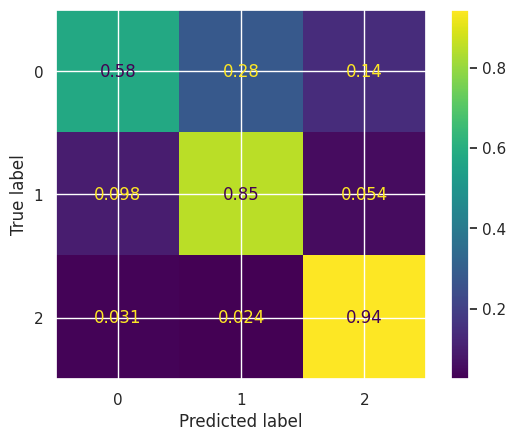

In [178]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize="true")
plt.show()


In [179]:
x_train_nn, x_val_nn, y_train_nn, y_val_nn = train_test_split(
    x_train, y_train, test_size=0.1, stratify=y_train, random_state=8
)
x_test_nn = x_test.copy()
y_test_nn = y_test.copy()

print(x_train_nn.shape, y_train_nn.shape)
print(x_val_nn.shape, y_val_nn.shape)
print(x_test_nn.shape, y_test_nn.shape)

(20073,) (20073,)
(2231,) (2231,)
(2479,) (2479,)


In [180]:
# Build word index
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train_nn)

word_index = tokenizer.word_index
vocab_size = len(word_index)
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 16750


In [181]:
x_train_nn = tokenizer.texts_to_sequences(x_train_nn)
x_val_nn = tokenizer.texts_to_sequences(x_val_nn)
x_test_nn = tokenizer.texts_to_sequences(x_test_nn)

In [182]:
print(x_train_nn[:3])

[[132, 180, 16, 2969, 7572, 1, 16], [14, 174, 16, 2623, 2], [176, 463, 1, 470]]


In [183]:
# Now, our docs in corpus have variative length.

min(len(doc) for doc in x_train_nn), max(len(doc) for doc in x_train_nn)

(0, 27)

In [184]:
# We will pad them so they become of the same length.

max_seq_length = 30
x_train_nn = pad_sequences(
    x_train_nn, maxlen=max_seq_length, padding="post", truncating="post"
)
x_val_nn = pad_sequences(
    x_val_nn, maxlen=max_seq_length, padding="post", truncating="post"
)
x_test_nn = pad_sequences(
    x_test_nn, maxlen=max_seq_length, padding="post", truncating="post"
)

min(len(doc) for doc in x_train_nn), max(len(doc) for doc in x_train_nn)

(30, 30)

In [185]:

from tensorflow.keras.utils import to_categorical

print(f"Before: {y_train_nn[:5]}")

y_train_nn = to_categorical(y_train_nn)
y_val_nn = to_categorical(y_val_nn)
y_test_nn = to_categorical(y_test_nn)

print(f"After: {y_train_nn[:5]}")

Before: [1 2 1 1 1]
After: [[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [186]:
model = Sequential()
model.add(Embedding(vocab_size, 64))
model.add(Bidirectional(LSTM(32, dropout=0.3, recurrent_dropout=0.3)))
model.add(Dense(16, activation="relu"))
model.add(Dense(3, activation="softmax")) # for 3 classes

model.compile(
    loss="categorical_crossentropy",
    optimizer=RMSprop(learning_rate=0.0001),
    metrics=["acc"]
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          1072000   
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                24832     
 onal)                                                           
                                                                 
 dense_2 (Dense)             (None, 16)                1040      
                                                                 
 dense_3 (Dense)             (None, 3)                 51        
                                                                 
Total params: 1097923 (4.19 MB)
Trainable params: 1097923 (4.19 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


error cell

In [187]:
# Now test the model.

y_pred = model.predict(x_test_nn)

scores = return_score(
    np.argmax(y_test_nn, axis=1), np.argmax(y_pred, axis=1)
)
print(f"Acc: {scores.acc: .5f} | F1: {scores.f1: .5f} | Precision : {scores.precision: .5f} | Recall: {scores.recall: .5f}")

78/78 [==============================] - 1s 11ms/step
Acc:  0.30617 | F1:  0.38130 | Precision :  0.61347 | Recall:  0.30617


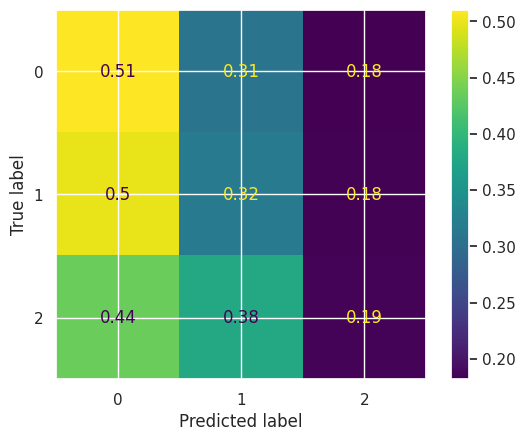

In [188]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(np.argmax(y_test_nn, axis=1), np.argmax(y_pred, axis=1), normalize="true")
plt.show()

In [189]:
# raw
# please apologize for the offensive language
# this does not represent my view in any way
test1 = "@CNN The weather forecast predicts sunshine and clear skies for tomorrow."
test2 = "I enjoy reading books and spending time in nature #selflove."
test3 = "Spending my weekends relaxing at home with a good movie with @sarah."
test4 = "I can't stand those immigrants ruining our country fuck them!!!"
test5 = "@melanie You damn broke bitch you should die LOL"

docs = [test1, test2, test3, test4, test5]
# tokenize
docs_processed = tokenizer.texts_to_sequences(docs)
# pad
docs_processed = pad_sequences(docs_processed, maxlen=max_seq_length, padding="post", truncating="post")
# predict
y_pred = np.argmax(model.predict(docs_processed), axis=1)

print("\nHate speech and offensive language detention algorithm.")
print("Model prediction:")
for doc, label in zip(docs, y_pred):
    print(f"{doc: <75} : predicted as {class_map.get(label)}")

1/1 [==============================] - 0s 28ms/step

Hate speech and offensive language detention algorithm.
Model prediction:
@CNN The weather forecast predicts sunshine and clear skies for tomorrow.   : predicted as hate speech
I enjoy reading books and spending time in nature #selflove.                : predicted as hate speech
Spending my weekends relaxing at home with a good movie with @sarah.        : predicted as hate speech
I can't stand those immigrants ruining our country fuck them!!!             : predicted as hate speech
@melanie You damn broke bitch you should die LOL                            : predicted as offensive speech


In [190]:
print("data in  x_train_nn\n",x_test_nn,"\ndata in x_train\n",x_train)

data in  x_train_nn
 [[    2     5   189 ...     0     0     0]
 [ 1042   268   418 ...     0     0     0]
 [  286    95   112 ...     0     0     0]
 ...
 [   15   427   602 ...     0     0     0]
 [  934   559   208 ...     0     0     0]
 [    1 15488   120 ...     0     0     0]] 
data in x_train
 ['best asian massage park slope top rated spa 718 622 0221 24'
 'girl 13 talking hate sleeping alone well bitch better buy damn teddy bear'
 'find funny asf people try tell live life like bitch stay shadow thank lol'
 ... 'fucking bitch never hit nigga back' 'fake bitch hey girl'
 'warm pussy']
